In [3]:
! git clone https://github.com/stripathy/NWB.git

Cloning into 'NWB'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 211 (delta 24), reused 34 (delta 14), pack-reused 161
Receiving objects: 100% (211/211), 38.87 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [26]:
import os
import sys
import glob
import argparse
import pandas as pd

from NWB.ABF1Converter import ABF1Converter ### import the converter class

In [27]:
# read final csv that has the ouput of metadata gathering process
csv_meta_save_path = 'output_files/cell_final_raw_meta_df.csv'
cell_final_raw_meta_df = pd.read_csv(open(csv_meta_save_path, 'rb'))  

In [28]:
def abf_to_nwb(inputPath, outFolder, outputMetadata, acquisitionChannelName, stimulusChannelName, overwrite, 
               responseGain = 1.0, stimulusGain = 1.0, responseOffset = 0.0, clampMode = 1):
    """
    Sample file handling script for NWB conversion.

    Takes the path to the ABF v1 file as the first command line argument and writes the corresponding NWB file
    to the folder specified by the second command line argument.

    NWB Files organized by cell, with assumption that each abf file corresponds to each cell
    """

    if not os.path.exists(inputPath):
        raise ValueError(f"The file or folder {inputPath} does not exist.")

    if not os.path.exists(outFolder):
        raise ValueError(f"The file or folder {outFolder} does not exist.")

    # Collect ABF files from the specified directory. 

    if os.path.isfile(inputPath):
        files = [inputPath]
    elif os.path.isdir(inputPath):
        files = glob.glob(inputPath + "/*.abf")
    else:
        raise ValueError(f"Invalid path {inputPath}: input must be a path to a file or a directory")

    if len(files) == 0:
        raise ValueError(f"Invalid path {inputPath} does not contain any ABF files.")

    for inputFile in files:

        fileName = os.path.basename(inputFile)
        root, _ = os.path.splitext(fileName)

        print(f"Converting {fileName}...")

        # Generate name for new NWB file

        outFile = os.path.join(outFolder, root + ".nwb")

        if os.path.exists(outFile):
            if overwrite:
                os.unlink(outFile)
            else:
                raise ValueError(f"The file {outFile} already exists.")

        # Enter each ABF file into the converter script. The additional arguments are meant for command line operations.

        conv = ABF1Converter(inputFile, outFile, 
                             acquisitionChannelName=acquisitionChannelName, stimulusChannelName=stimulusChannelName, 
          responseGain = responseGain,
          stimulusGain = stimulusGain,
          responseOffset = responseOffset, clampMode = clampMode
                            )
        conv.convert()

        if outputMetadata:
            conv._outputMetadata()


In [29]:


curr_file = '19320030.abf'



#meta_dict = cell_final_raw_meta_df
meta_row = cell_final_raw_meta_df.loc[cell_final_raw_meta_df['cell_id'] == curr_file]
file_path = meta_row['full_path'].values[0]
print(file_path)
stim_file_path = meta_row['stim_path'].values[0]

resp_abf = pyabf.ABF(file_path)
stim_abf = pyabf.ABF(stim_file_path) # for some files we're using stim traces from a different file

num_sweeps = int(meta_row['num_sweeps'].values[0])

stim_channel_num = int(meta_row['stim_chan'].values[0])
response_chan_num = int(meta_row['resp_chan'].values[0])
stim_gain = meta_row['stim_gain'].values[0]
if stim_gain == 1000:
    stim_gain = 1.0
response_gain = meta_row['resp_gain'].values[0]

start_time = meta_row['stim_start_time'].values[0]
end_time = meta_row['stim_end_time'].values[0]
resp_sampling_rate = meta_row['resp_sampling_rate'].values[0]
stim_sampling_rate = meta_row['stim_sampling_rate'].values[0]
resp_offset = meta_row['resp_offset'].values[0]
stim_name = meta_row['stim_name'].values[0]

/Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/19320030.abf


In [30]:
acq_channel_name = resp_abf.adcNames[response_chan_num]

if stim_name == 'sweepC':
    stim_chan_name = resp_abf.dacNames[stim_channel_num]
else:                  
    stim_chan_name = resp_abf.adcNames[stim_channel_num]
    
print(acq_channel_name)
print(stim_chan_name)

Iclamp
Current_in


In [31]:
abf_path = file_path
print(abf_path)
outFolder = '/Users/stripathy/Downloads/'
outputMetadata = True

#acq_channel_name = '200B IC'
#stim_chan_name = 'Cmd 0 IC'
responseGain = response_gain
responseOffset = resp_offset
stimulusGain = stim_gain
clampMode = 1

abf_to_nwb(inputPath=abf_path,
           outFolder=outFolder,
           outputMetadata=False,
           acquisitionChannelName=acq_channel_name,
           stimulusChannelName=stim_chan_name,
           overwrite=True, 
          responseGain = responseGain,
          stimulusGain = stimulusGain,
          responseOffset = responseOffset, clampMode = clampMode)

/Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/19320030.abf
Converting 19320030.abf...
/Users/stripathy/Downloads/valiante_lab_ephys_mar_2020/L5/Homeira/Total5Homeira-Last-Version - without 2020 Data/19320030.abf


Date is missing timezone information. Updating to local timezone.


Successfully converted to /Users/stripathy/Downloads/19320030.nwb.


In [32]:
from ipfx.hbg_dataset import HBGDataSet

In [33]:
nwb_file_name = outFolder + '2016_02_04_0018.nwb'
print(nwb_file_name)
data_set = HBGDataSet(nwb_file=nwb_file_name, ontology = ) ##loads the NWB as an HBG dataset, Equal to the nwb1.0 -> AIBS dataset

SyntaxError: invalid syntax (<ipython-input-33-e4439fd6699c>, line 3)

In [25]:
pd.DataFrame(data_set.extract_sweep_stim_info())

,bridge_balance_mohm,leak_pa,stimulus_code,stimulus_code_ext,stimulus_scale_factor,stimulus_units,sweep_number
0,None,None,NA,NA,20.0,Amps,0
1,None,None,NA,NA,20.0,Amps,10
2,None,None,NA,NA,20.0,Amps,11
3,None,None,NA,NA,20.0,Amps,12
4,None,None,NA,NA,20.0,Amps,13
5,None,None,NA,NA,20.0,Amps,14
6,None,None,NA,NA,20.0,Amps,15
7,None,None,NA,NA,20.0,Amps,16
8,None,None,NA,NA,20.0,Amps,17
9,None,None,NA,NA,20.0,Amps,18


In [18]:
data_set.sweep_set([0, 13]).sweeps[1].i[2000]

0.0

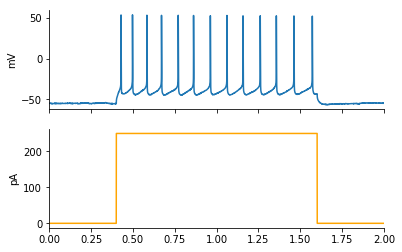

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ipfx.sweep import Sweep, SweepSet

sweep_plot_index = 13
curr_sweep = data_set.sweep_set([0, 13]).sweeps[1]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(0, 2)
axes[0].set_ylabel("mV")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("pA")

sns.despine()